**Zadatak)** Eksplorativna analiza i klasterovanje kupaca
    - Skup podataka: Mall_Customers.csv


--- PRVIH 5 REDOVA ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

--- OPISNE S

/tmp/ipython-input-1504646912.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="pastel")


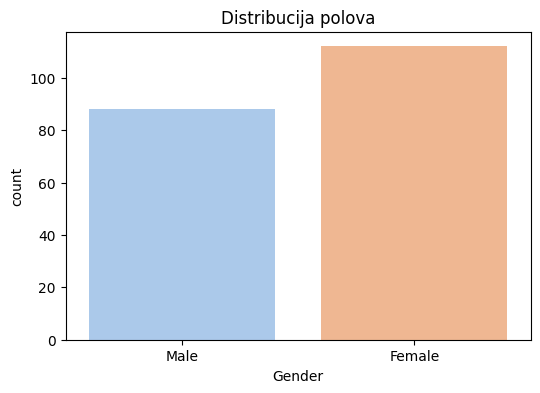

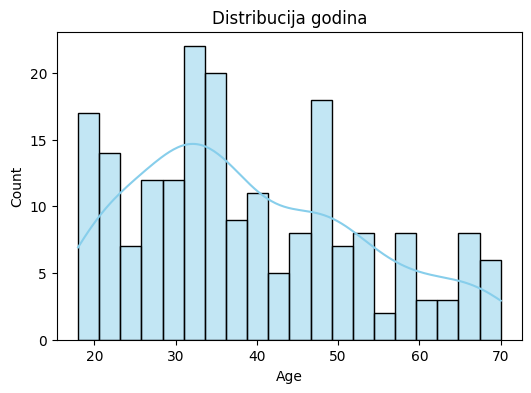

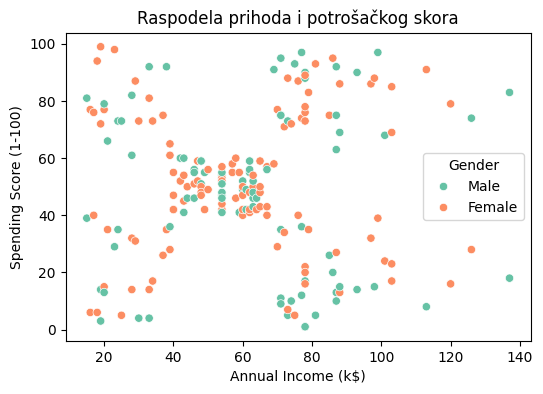

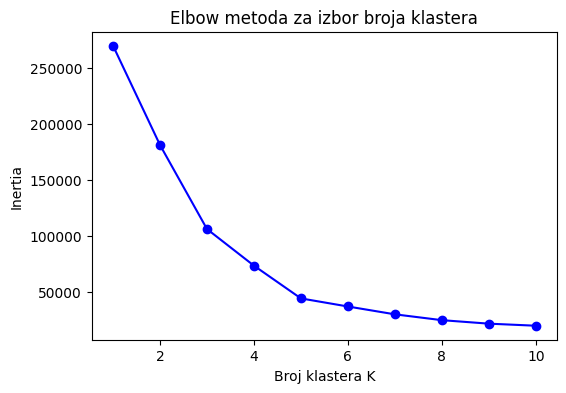


--- Broj kupaca po klasteru ---
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Silhouette skor (0-1, veći je bolji): 0.554


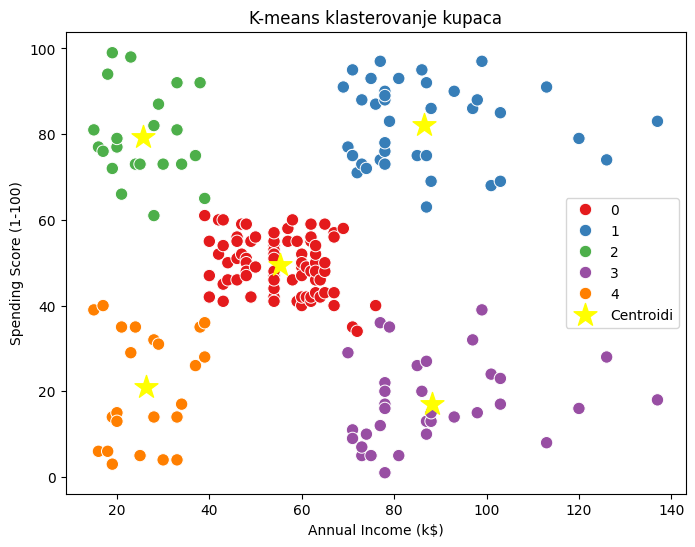

In [5]:
# ===============================
# KLASTEROVANJE KUPACA - Mall_Customers.csv
# ===============================

# 1. Import biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ===============================
# 2. Učitavanje podataka
# ===============================
df = pd.read_csv("Mall_Customers.csv")

print("\n--- PRVIH 5 REDOVA ---")
print(df.head())

print("\n--- INFO ---")
print(df.info())

print("\n--- OPISNE STATISTIKE ---")
print(df.describe())

# ===============================
# 3. Eksplorativna analiza podataka (EDA)
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", palette="pastel")
plt.title("Distribucija polova")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribucija godina")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette="Set2")
plt.title("Raspodela prihoda i potrošačkog skora")
plt.show()

# ===============================
# 4. Priprema podataka za klasterovanje
#    (koristimo Annual Income i Spending Score jer su najrelevantniji za segmente kupaca)
# ===============================
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# ===============================
# 5. Pronalaženje optimalnog broja klastera (Elbow metoda)
# ===============================
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, "bo-")
plt.xlabel("Broj klastera K")
plt.ylabel("Inertia")
plt.title("Elbow metoda za izbor broja klastera")
plt.show()

# ===============================
# 6. K-means klasterovanje
# Pretpostavimo iz elbow grafa da je optimalan K=5
# ===============================
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

print("\n--- Broj kupaca po klasteru ---")
print(df["Cluster"].value_counts())

# ===============================
# 7. Procena kvaliteta modela
# ===============================
sil_score = silhouette_score(X, df["Cluster"])
print(f"\nSilhouette skor (0-1, veći je bolji): {sil_score:.3f}")

# ===============================
# 8. Vizuelizacija klastera
# ===============================
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df["Cluster"], palette="Set1", s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c="yellow", marker="*", label="Centroidi")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-means klasterovanje kupaca")
plt.legend()
plt.show()


### 📌 Objašnjenje koda

* **EDA (eksplorativna analiza)** → gledamo raspodelu godina, polova, prihoda i skora.
* **Priprema podataka** → biramo najrelevantnije osobine (`Annual Income`, `Spending Score`).
* **Elbow metoda** → koristi se da vidimo gde kriva „prelomi“ → optimalan broj klastera.
* **K-means** → deli kupce na grupe sličnih karakteristika.
* **Silhouette skor** → meri kvalitet klastera (0–1). Prevedemo ga u procenat.
* **Vizuelizacija** → jasno se vide grupe kupaca i centri klastera (žute zvezde).
